**Assignment 3**

**By Roll Number 2023702013**



Q1: Face detection and association-based tracking [4.5 points]

1. Data preparation. We will implement face detection and tracking on a famous scene from the movie Forrest Gump. To prepare the dataset, please download the video clip from https://www.youtube.com/ watch?v=bSMxl1V8FSg (the mp4 at 480p resolution) and burst the first 30 seconds into frames (you should get about 719-720 frames).
Hint 1: https://github.com/ytdl-org/youtube-dl is a great tool to download Youtube videos. Use -F flag to identify which format to download.
Hint 2: ffmpeg is a wonderful tool to burst the video into frames. But you may also use decord or other libraries for video manipulation (be wary of different frame rates!).


In [2]:
#import the frames

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

frames = []
frame_dir = 'data/'
for file in os.listdir(frame_dir):
    file_path = os.path.join(frame_dir, file)  # Construct the full file path
    f = cv2.imread(file_path)
    if f is not None:  # Check if the image was successfully loaded
        f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
        frames.append(f)
    else:
        print(f"Warning: could not read image from {file_path}")

frames=np.array(frames)
print(frames.shape)

#plot the frames
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(frames[i])
    plt.axis('off')



AttributeError: partially initialized module 'cv2' has no attribute 'dnn' (most likely due to a circular import)

2. [1.5 points] Face detection. Use the Viola-Jones Haar cascades based face detector from OpenCV to detect faces in each frame. How long does it take to process each frame? Identify some key factors of the algorithm that could change the time.
Hint: you may need to look within the xml config file.

In [4]:
import cv2

face_cascade = cv2.CascadeClassifier( '/Users/sunayana/Documents/GitHub/CV/assignment3/haarcascade_frontalface_default.xml')


In [5]:
def detect_faces(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces


In [9]:
import time

start_time = time.time()
for frame in frames:
    faces = detect_faces(frame)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
end_time = time.time()
print("Processing time: {:.2f} ms".format((end_time - start_time) * 1000))

for frame in frames:
    i=0
    faces = detect_faces(frame)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        #save each frame
        cv2.imwrite('/processed_data/'+str(i)+'.jpg', frame)
    i+=1




Processing time: 27241.76 ms


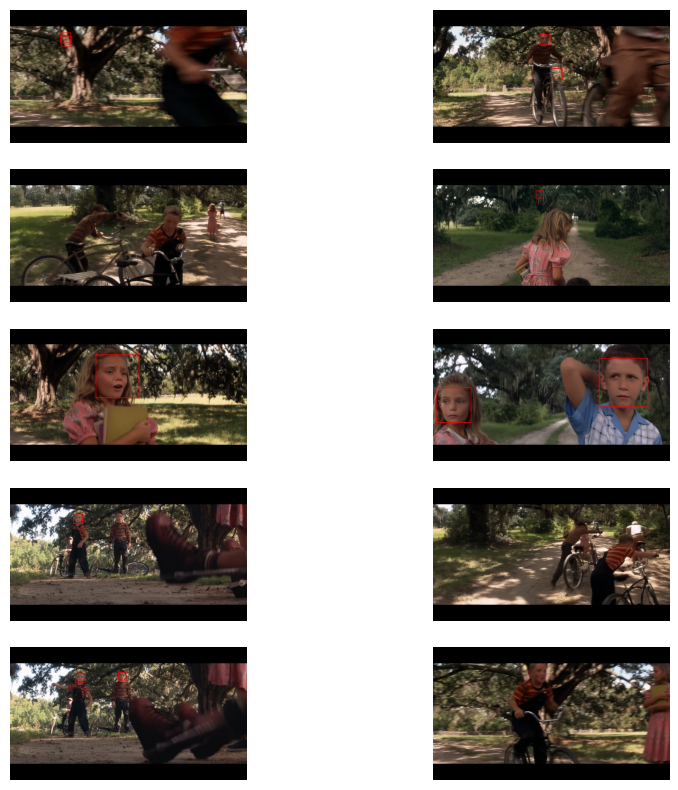

In [5]:
#randomly show 10 frames with faces detected
import random
plt.figure(figsize=(10,10))
for i in range(10):
    idx = random.randint(0, len(frames)-1)
    frame = frames[idx].copy()
    faces = detect_faces(frame)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.subplot(5,2,i+1)
    plt.imshow(frame)
    plt.axis('off')

3. Face detection visualization. Visualize the face detections made over the first 30s frames as a new video. Link to the video from your google drive. Watch the video and draw three conclusions about when does the face detector work or fail. Why do you think this is the case?
Hint: You can use cv2.rectangle to draw boxes on the image and then save them back to disk. Then ffmpeg can be used again to stitch together the frames into a new video.

In [8]:
!ffmpeg -framerate 24 -i processed_frames/frame_%03d.jpg -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p output_video.mp4


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57

4. [1.5 point] Association-based tracking. Tracking can be used to associate face detections across time and understand that it is the same character appearing across multiple frames of the movie. We will explore a simple way to perform tracking.
(i) Generate face tracks by comparing face detections in two consecutive frames and associating them based on IoU scores. You may want to associate faces only when IoU > 0.5. Do consider what happens when there are multiple face detections in both frames. Start new tracks for faces not seen in the previous frame. End existing tracks when faces are not visible in the next frame. How many unique tracks did you create in the first 30 seconds?
(ii) Update the video visualization above to now include a unique track identifier (an integer number is fine), shown inside each box. Link to the video from your google drive.
Hint: You may use cv2.putText to write these numbers. Make sure they are readable after stitching together the frames into a video.
(iii) Comment about the quality of the face tracks. Do different people get associated in one track? Is a unique character associated with one unique track id? Note the timestamps of some failure cases and explain why.